In [1]:
from src.cluster.modularity_clustering import modularity_clustering
from src.Graph import Graph
import networkx as nx
import matplotlib.pyplot as plt
import random
import src.cluster.cluster_algorithm as Ca

G = Graph("networks/special_case_for_networkx.mtx")
G = Graph("networks/out.ucidata-zachary_")


In [2]:
def visualize_segmentation(file, calc_segmentation):
    nxG = nx.read_gexf(file)
    nxG = nx.relabel_gexf_graph(nxG)
    G = Graph()
    for n in nxG.nodes():
        n = n.replace(" ","_")
        G.add_node(n)
    for e1, e2 in nxG.edges():
        e1 = e1.replace(" ", "_")
        e2 = e2.replace(" ", "_")
        G.add_edge(e1,e2)

    segmentation = calc_segmentation(G)

    colors = ["green", "yellow","red", "blue", "pink", "purple", "orange"]
    color_id = 0
    nx_index = [n for n in nxG]
    color_map = [ "black" for n in nxG]
    for segment in segmentation:
        color = colors[color_id]
        for n in nxG:
            if n.replace(" ", "_") in segment:
                color_map[nx_index.index(n)] = color
        color_id += 1

    # 1114, 833, 1997, 764,  947, 164
    seed = random.randint(1,2000)
    print(seed)

    my_pos = nx.spring_layout(nxG, seed = 1104)
    plt.figure(figsize=(12,12))
    nx.draw(nxG, pos = my_pos, node_color= color_map,with_labels=True, node_size=500, edge_color='black', linewidths=1, font_size=8)
    plt.show()

In [3]:
#visualize_segmentation("networks/movies/Dune.gexf", modularity_clustering)
def cluster_disagreement(G): 
    cl, _ = Ca.first_heuristic(G, version="dis")
    return cl
def cluster_modularity_hanno(G): 
    cl, _ = Ca.first_heuristic(G)
    return cl
def cluster_modularity_min_cut(G): 
    cl, _ = Ca.second_heuristic(G)
    print(cl)
    return cl

[{'TROOPERS', 'STILGAR', 'HARKONNEN_GUARD_#1', 'MAPES', 'TANKED_GUILDSMAN_#2', 'PITER', 'HARAH', 'MONK', 'DUNCAN', 'MONK_#1', 'DR_YUEH', 'RABBAN', 'FEYD', 'GURNEY', 'CHANI', 'EMPEROR', 'PAUL', 'ALIA', 'SARDAUKAR_OFFICER_#2', 'NARRATOR', 'DOCTOR', 'HARKONNEN_GUARD_#2', 'KYNES', 'REVEREND_MOTHER_RAMALLO', 'YUEH', 'CROWDS', 'DUKE_LETO', 'KORBA', 'BARON', 'NAVIGATOR', 'SHADOUT_MAPES', 'REVEREND_MOTHER', 'JESSICA', 'THUFIR'}]
1279


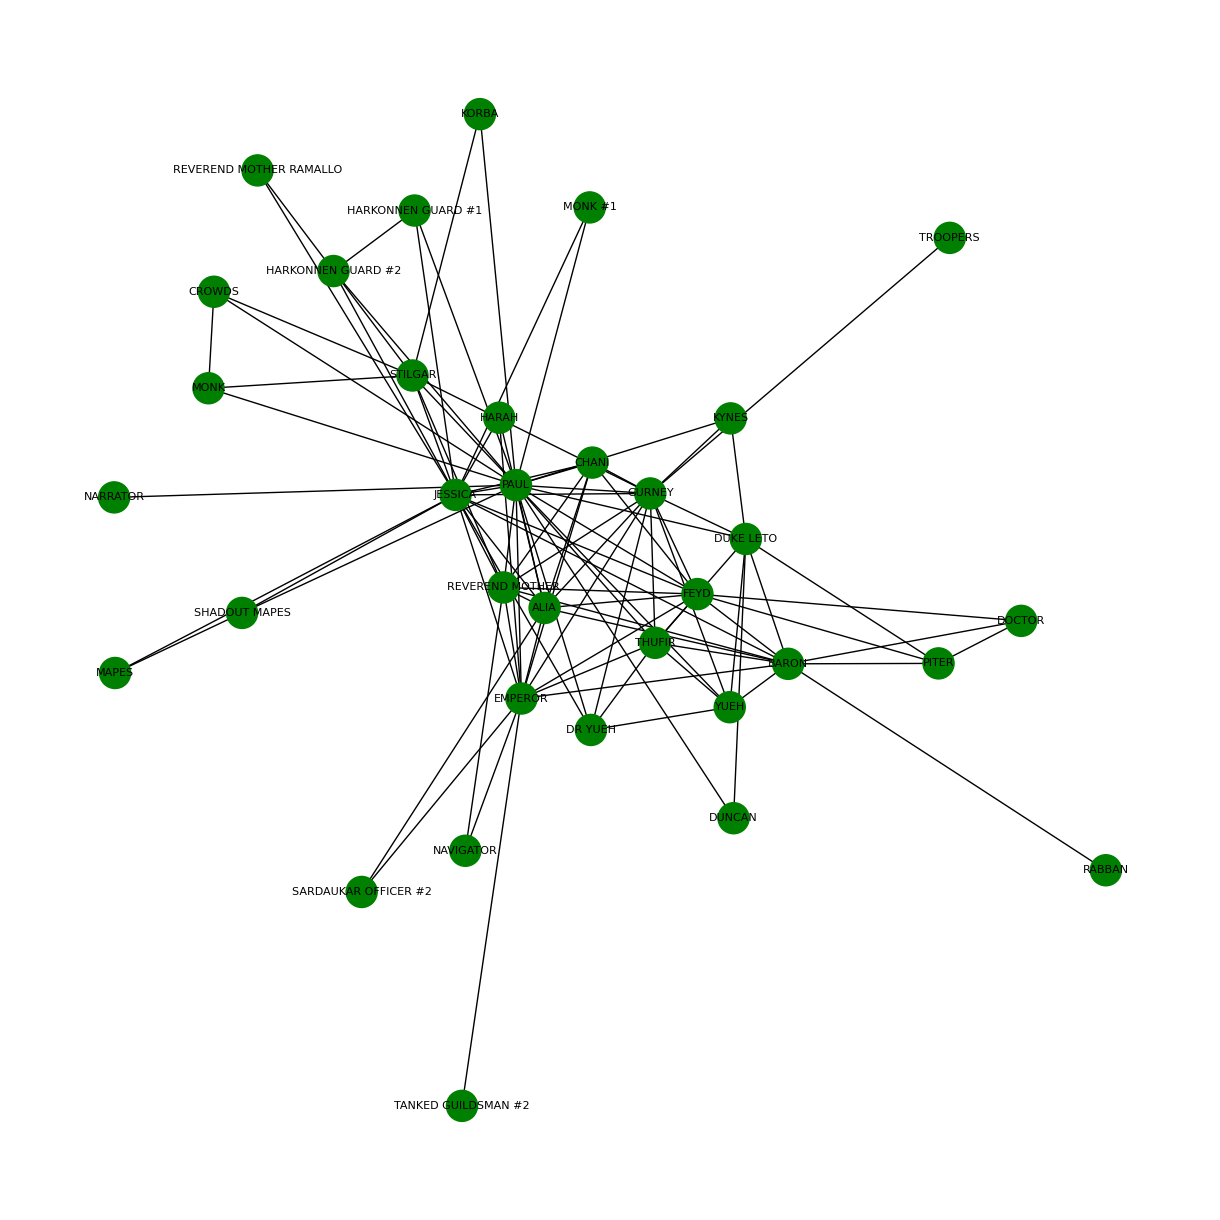

In [10]:

visualize_segmentation("networks/movies/Dune.gexf", cluster_modularity_min_cut)

1415


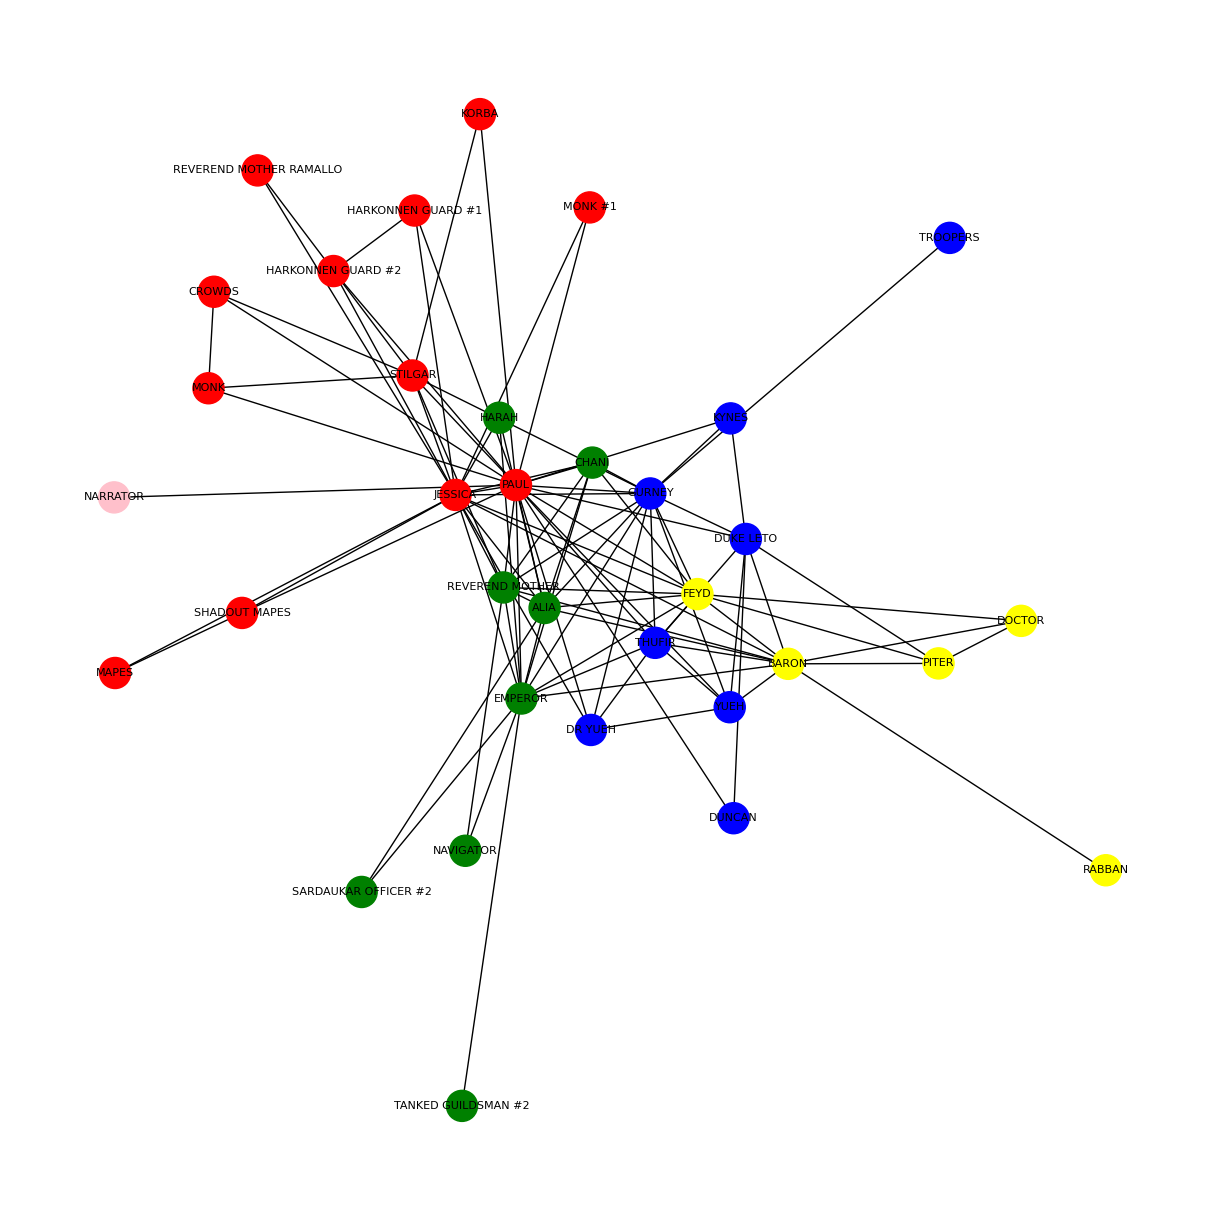

In [5]:
visualize_segmentation("networks/movies/Dune.gexf", modularity_clustering)

1076


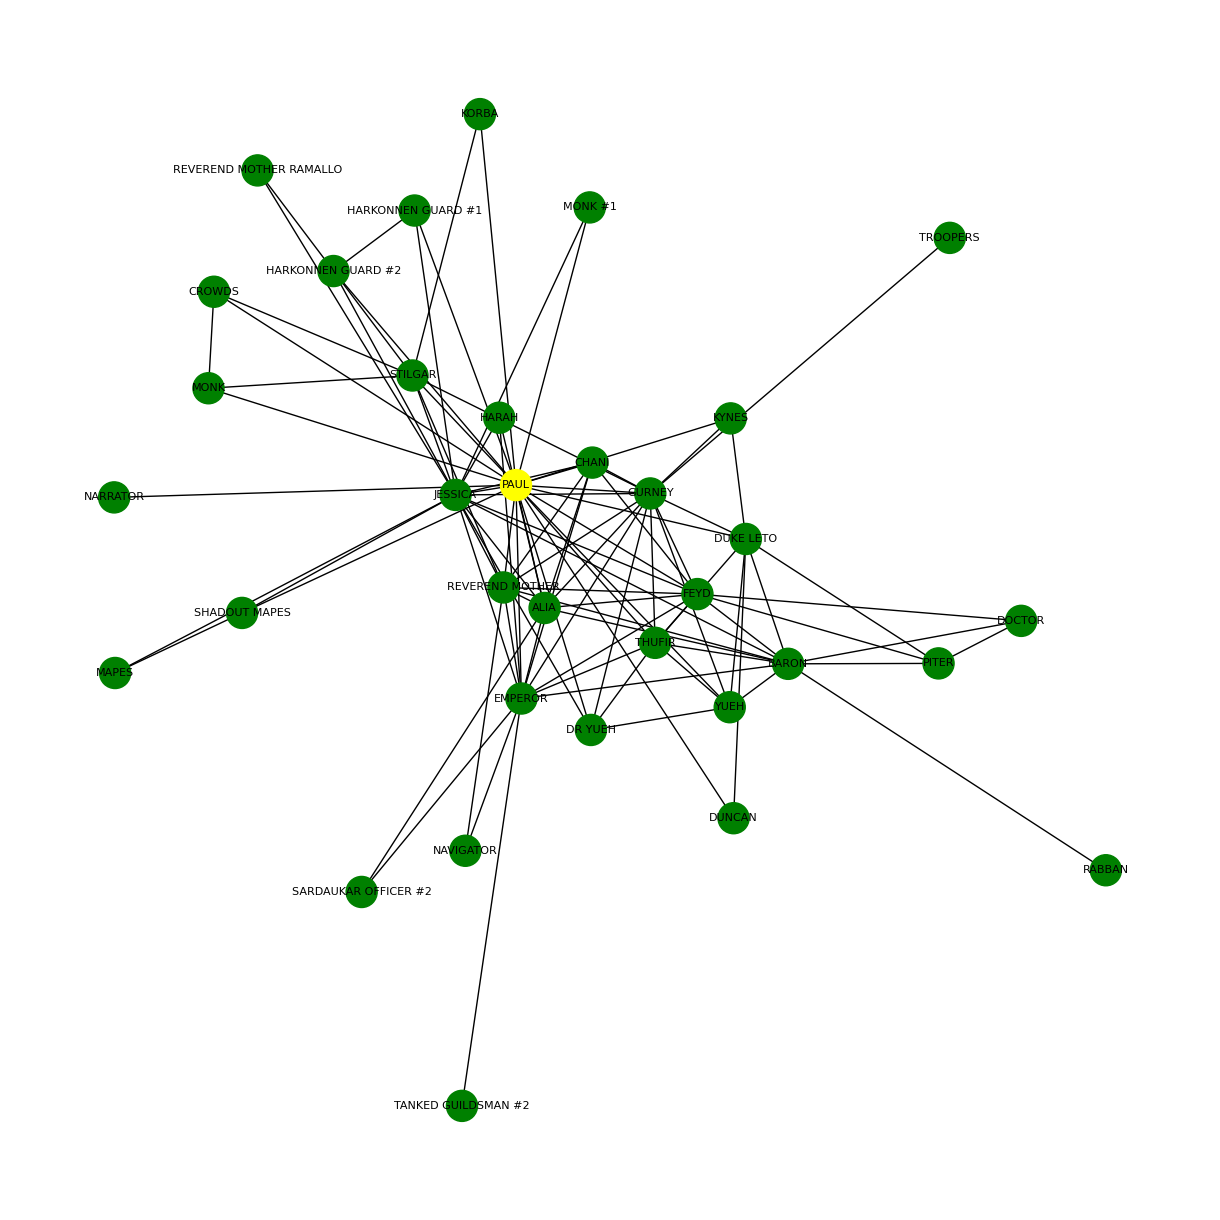

In [6]:
visualize_segmentation("networks/movies/Dune.gexf", cluster_disagreement)

1827


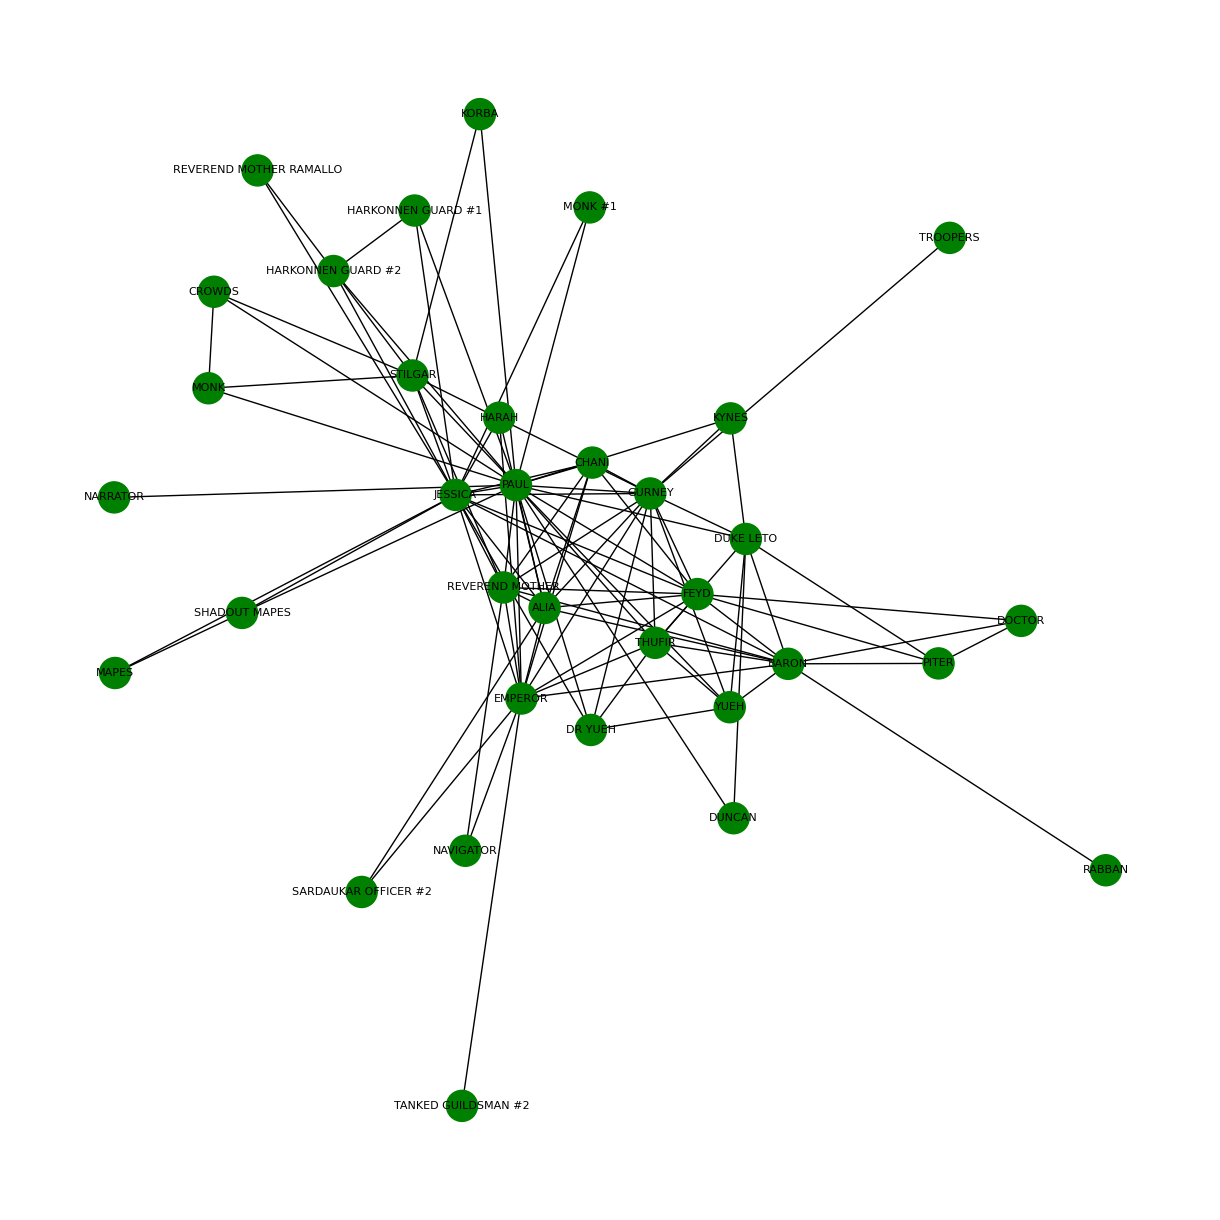

In [7]:
visualize_segmentation("networks/movies/Dune.gexf", cluster_modularity_hanno)

582


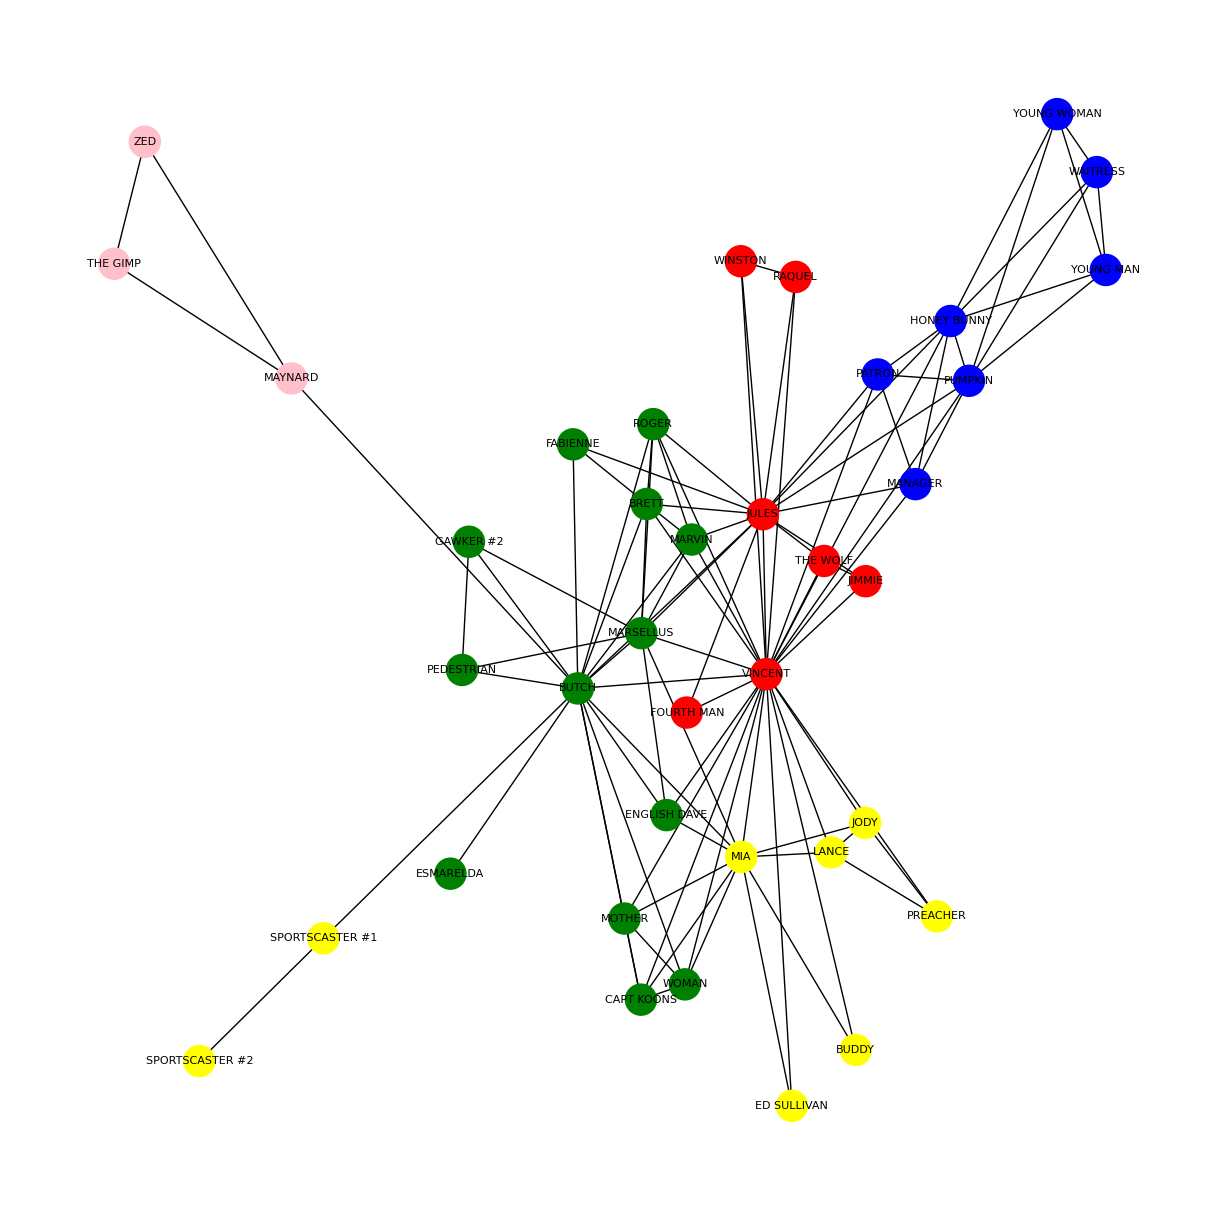

In [8]:
visualize_segmentation("networks/movies/pulpfiction.gexf", modularity_clustering)

1902


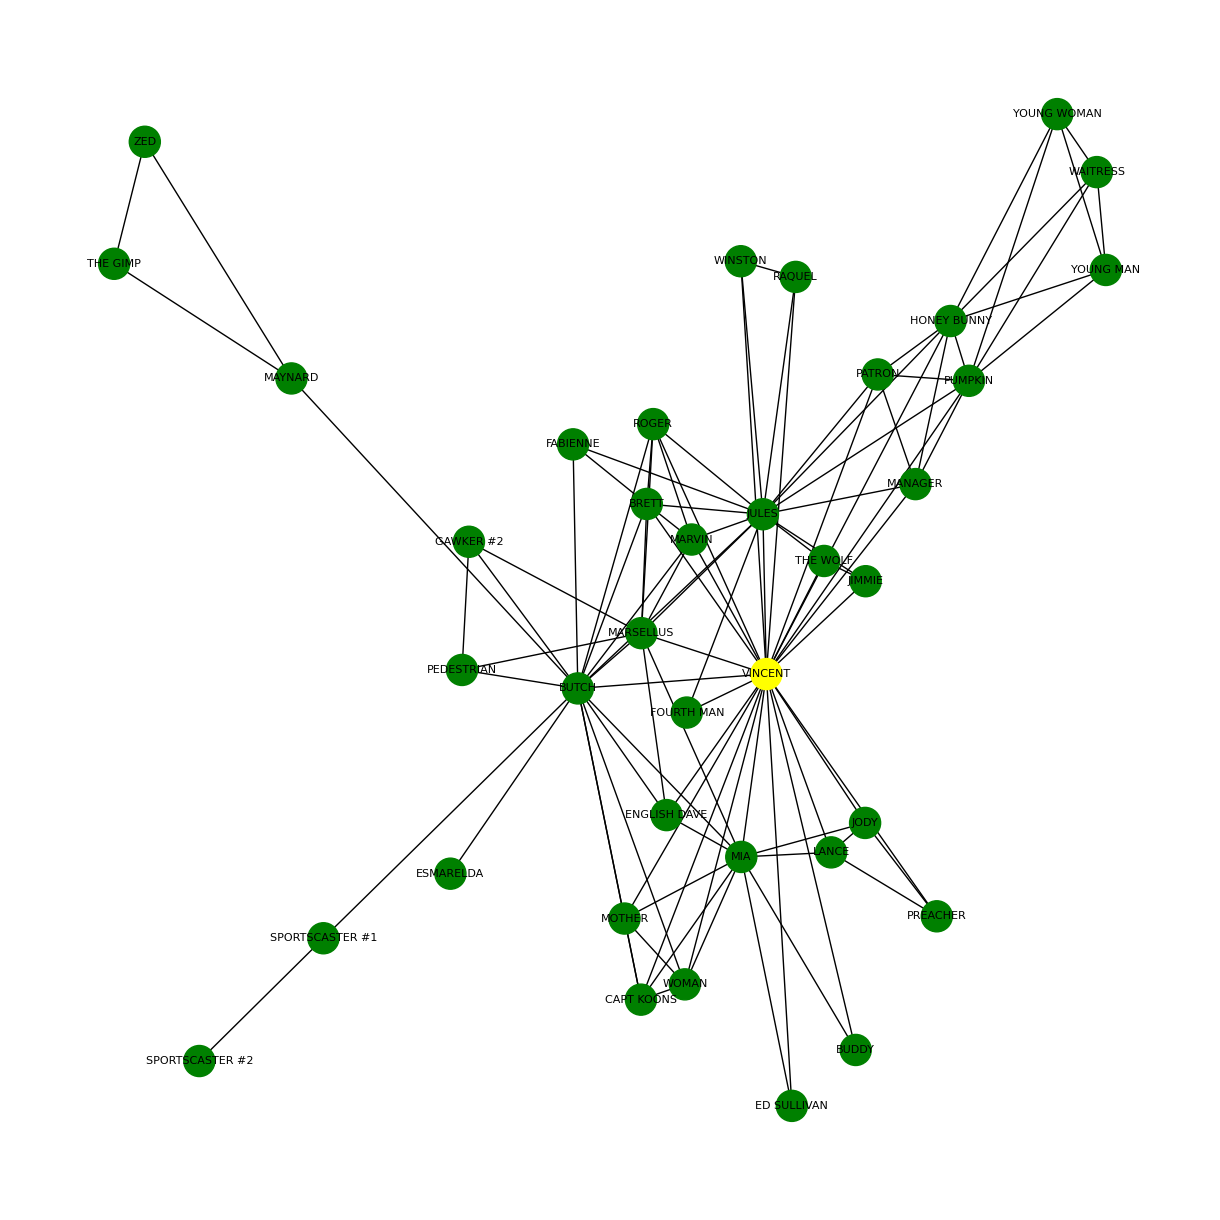

In [9]:

visualize_segmentation("networks/movies/pulpfiction.gexf", cluster_disagreement)

[{'YOUNG_WOMAN', 'PUMPKIN', 'THE_WOLF', 'BUDDY', 'PREACHER', 'THE_GIMP', 'VINCENT', 'FABIENNE', 'ED_SULLIVAN', 'GAWKER_#2', 'JODY', 'YOUNG_MAN', 'MARVIN', 'WAITRESS', 'PATRON', 'LANCE', 'WINSTON', 'FOURTH_MAN', 'WOMAN', 'MANAGER', 'CAPT_KOONS', 'RAQUEL', 'BRETT', 'SPORTSCASTER_#1', 'ENGLISH_DAVE', 'MOTHER', 'HONEY_BUNNY', 'ROGER', 'MAYNARD', 'SPORTSCASTER_#2', 'ESMARELDA', 'BUTCH', 'JULES', 'JIMMIE', 'ZED', 'MIA', 'MARSELLUS', 'PEDESTRIAN'}]
623


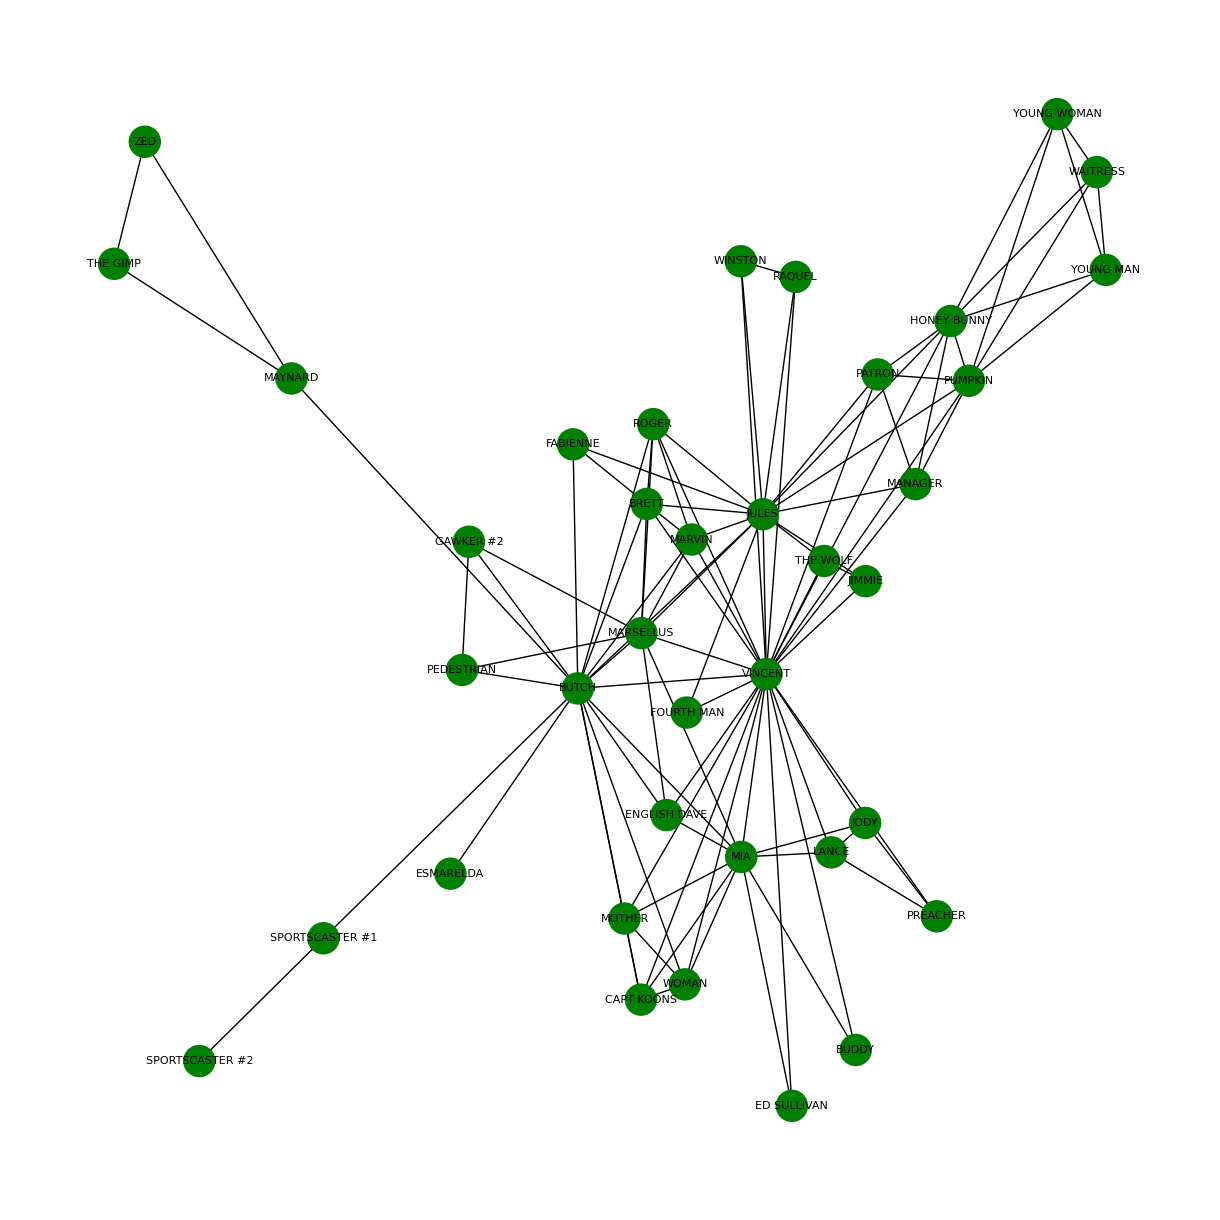

In [11]:
visualize_segmentation("networks/movies/pulpfiction.gexf", cluster_modularity_min_cut)